In [3]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 	Color encoding:
#	0 = dark
#	1 = red
#	2 = amber
#	3 = green
#	4 = red amber
#	5 = amber flashing
#	6 = green flashing

color_rgb_map = {
    0: (0, 0, 0),
    1: (255, 0, 0),
    2: (255, 128, 0),
    3: (0, 255, 0),
    4: (255, 255, 0),
    5: (255, 255, 0),
    6: (0, 255, 0),
}

green_states_rgb_map = {
    0: (0, 0, 0),
    1: (0, 255, 0),
}

# Iterate over the json files in /outputs directory and plot the results

top_left_cells = []
top_right_cells = []
bottom_left_cells = []
bottom_right_cells = []

for filename in os.listdir("case_studies_random"):
    if ".json" not in filename:
        continue
    if "top_left" in filename:
        top_left_cells.append(filename)
    elif "top_right" in filename:
        top_right_cells.append(filename)
    elif "bottom_left" in filename:
        bottom_left_cells.append(filename)
    elif "bottom_right" in filename:
        bottom_right_cells.append(filename)
        
min_length = min([len(top_left_cells), len(top_right_cells), len(bottom_left_cells), len(bottom_right_cells)])

def show_cycles(data, key):
    cycle_sets = data["Cycles"]
    first = True
    for cycle_set in cycle_sets:
        cycle_result_rows = []
        for cycle in cycle_set:
            results_string = cycle["Results"]
            results_string = results_string.replace("[", "")
            results_string = results_string.replace("]", "")
            results = results_string.split(" ")
            colors = [color_rgb_map[int(result)] for result in results]
            cycle_result_rows.append(colors)
        max_cycle_length = max([len(c) for c in cycle_result_rows])
        cycles_reconstructed = []
        for cycle in cycle_result_rows:
            row = cycle
            if len(row) < max_cycle_length:
                row = row + [(8, 0, 255)] * (max_cycle_length - len(row))
            cycles_reconstructed.append(row)
        # plt.imshow(green_state_colors)
        # plt.show()
        """ try:
            img = mpimg.imread(f'outputs/{key}_signal.png')
            imgplot = plt.imshow(img)
            plt.axis('off')
            plt.show()
            img = mpimg.imread(f'outputs/{key}_freq.png')
            imgplot = plt.imshow(img)
            plt.axis('off')
            plt.show()
        except FileNotFoundError:
            continue """
        IgpTD = data["IgpTD"]
        IcyPD = data["IcyPD"]
        if first: 
            plt.title(f"{key} - IgpTD: {IgpTD}, IcyPD: {IcyPD}")
            first = False
        plt.imshow(cycles_reconstructed)
        plt.show()
    

for i in range(min_length):
    top_left_cell = top_left_cells[i]
    top_right_cell = top_right_cells[i]
    bottom_left_cell = bottom_left_cells[i]
    bottom_right_cell = bottom_right_cells[i]
    with open("case_studies_random/" + top_left_cell) as f:
        top_left_data = json.load(f)
    with open("case_studies_random/" + top_right_cell) as f:
        top_right_data = json.load(f)
    with open("case_studies_random/" + bottom_left_cell) as f:
        bottom_left_data = json.load(f)
    with open("case_studies_random/" + bottom_right_cell) as f:
        bottom_right_data = json.load(f)
        
    show_cycles(top_left_data, top_left_cell)
    show_cycles(top_right_data, top_right_cell)
    show_cycles(bottom_left_data, bottom_left_cell)
    show_cycles(bottom_right_data, bottom_right_cell)
        
    
    


FileNotFoundError: [Errno 2] No such file or directory: 'case_studies/top_left_1085_19_3_14.json'

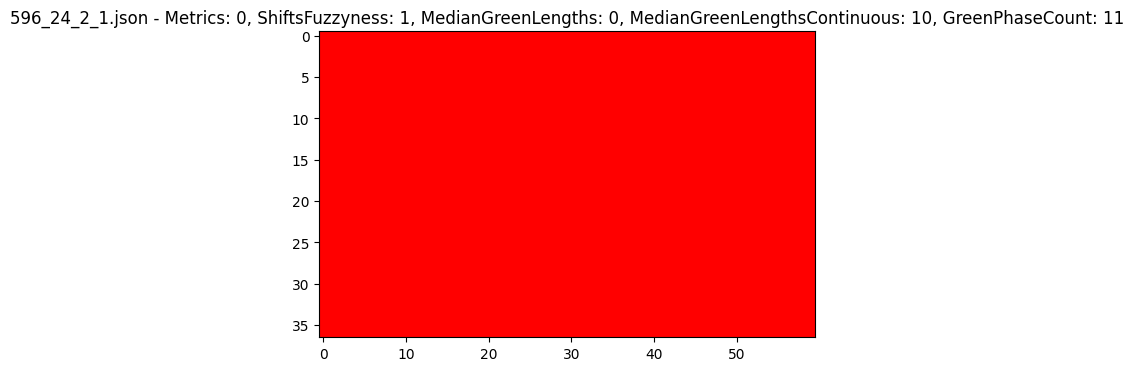

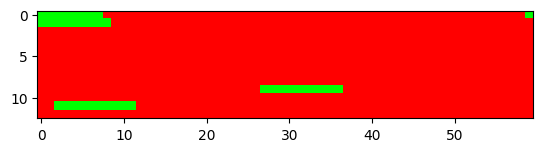

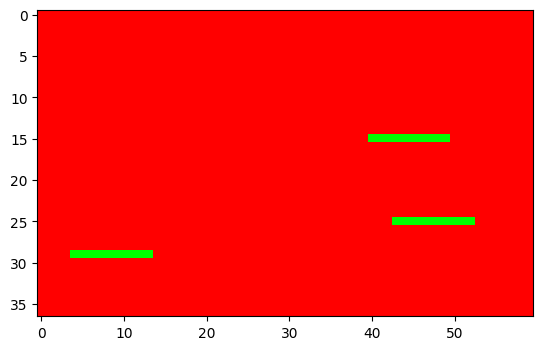

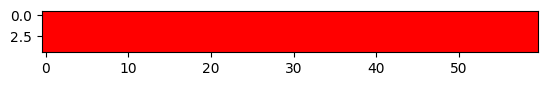

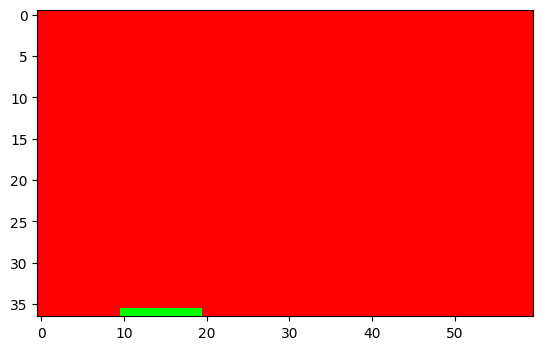

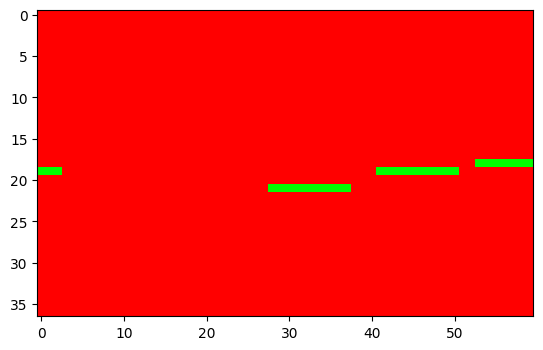

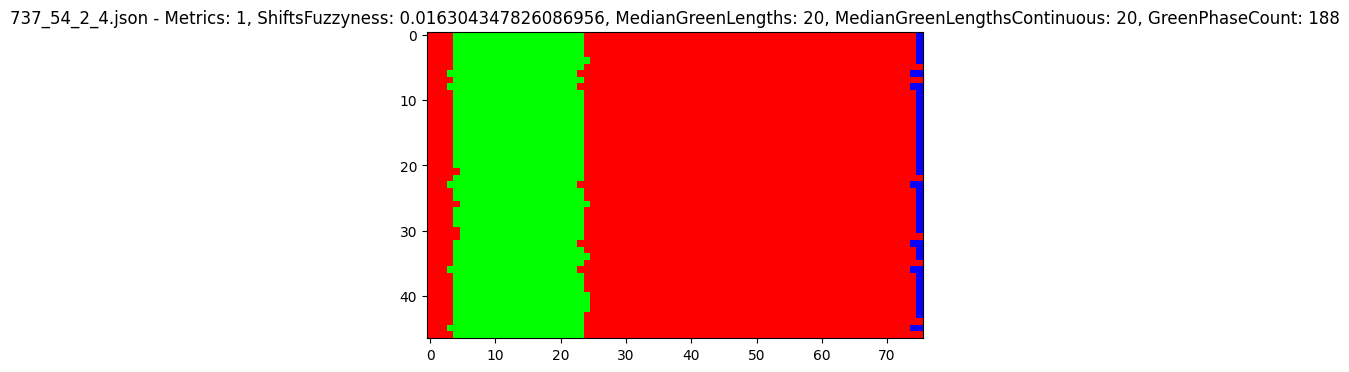

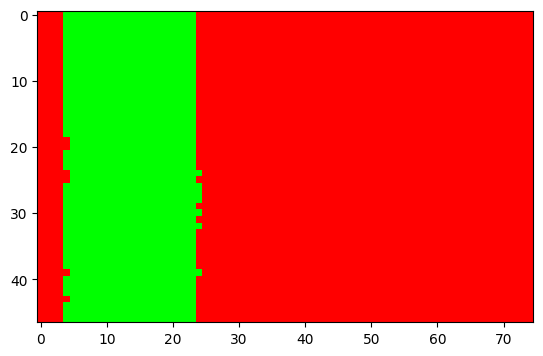

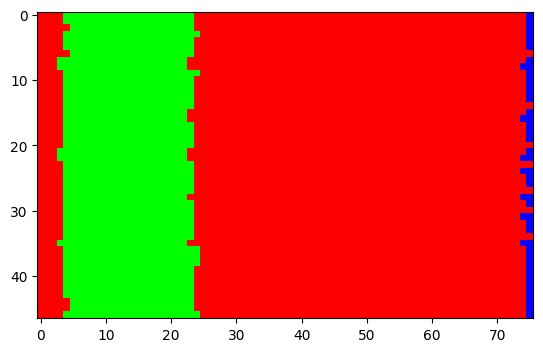

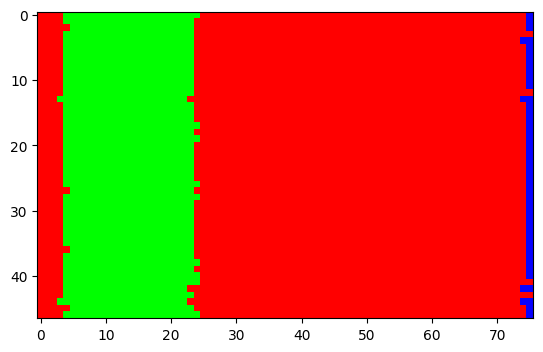

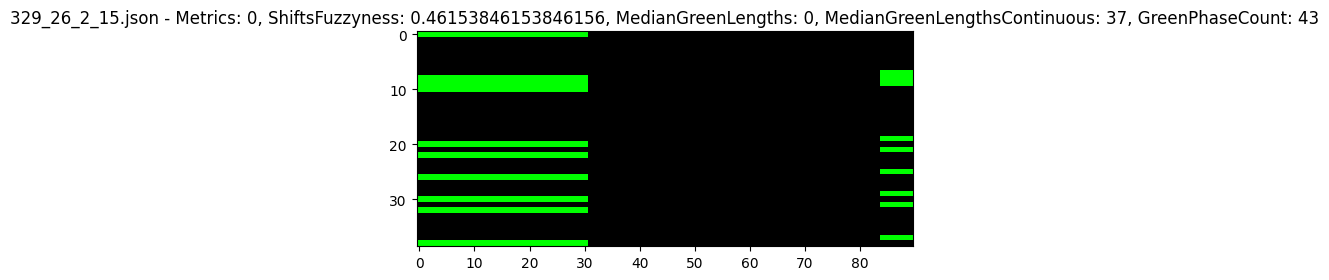

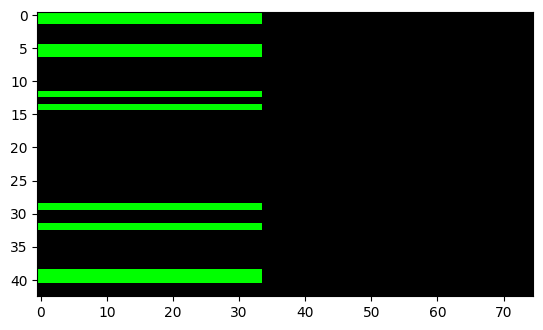

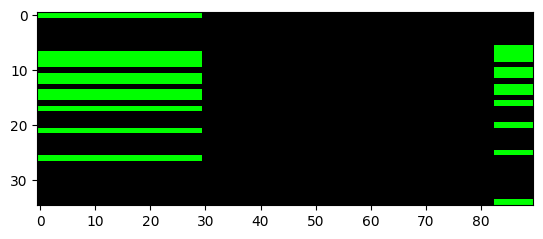

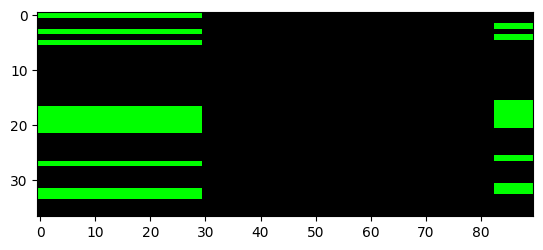

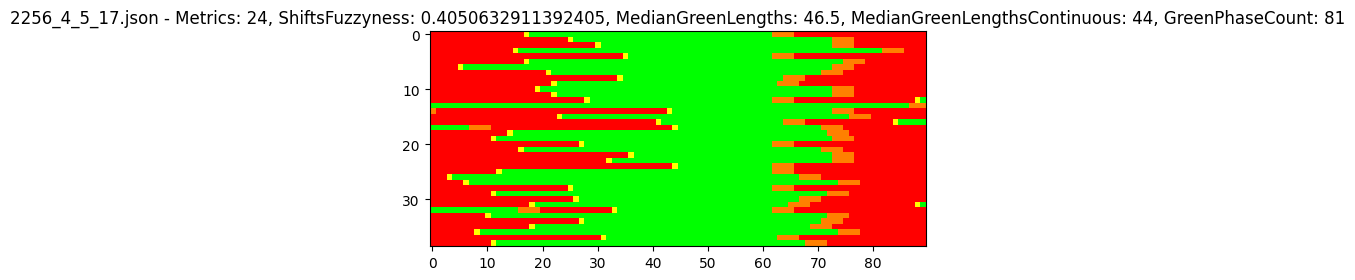

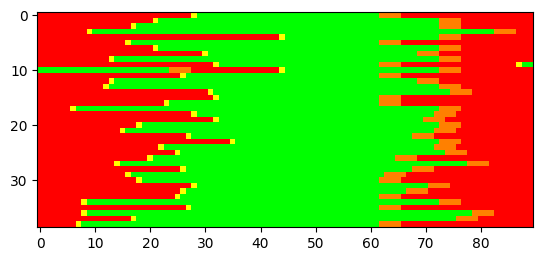

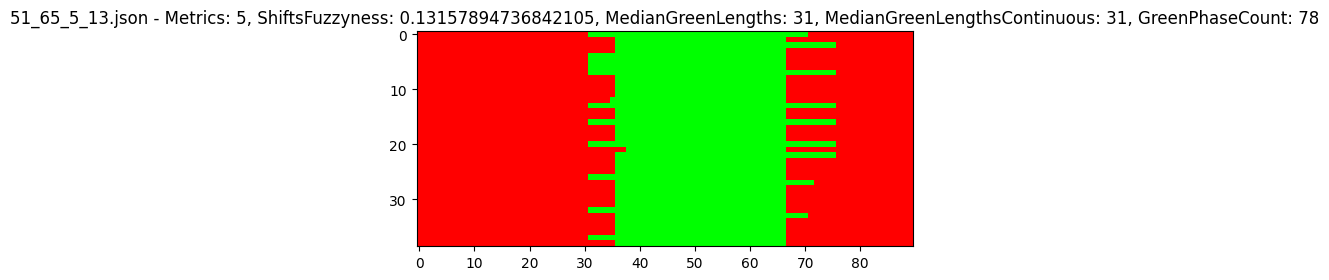

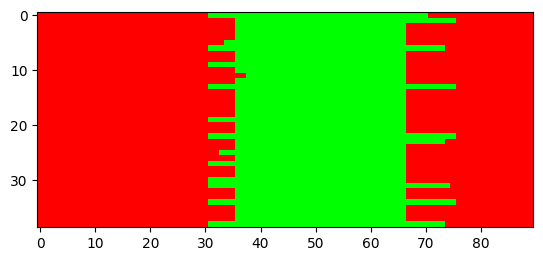

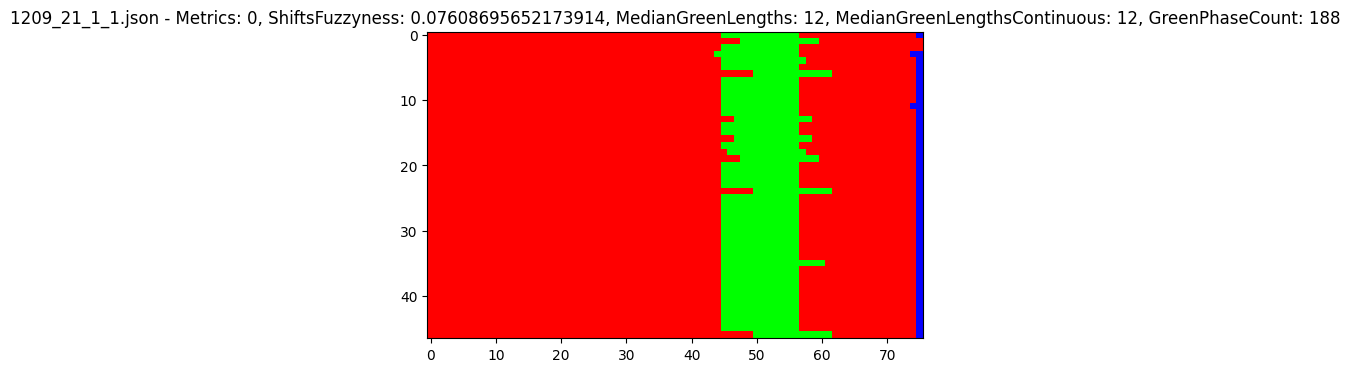

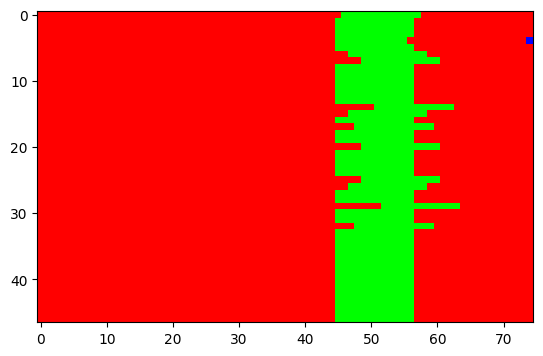

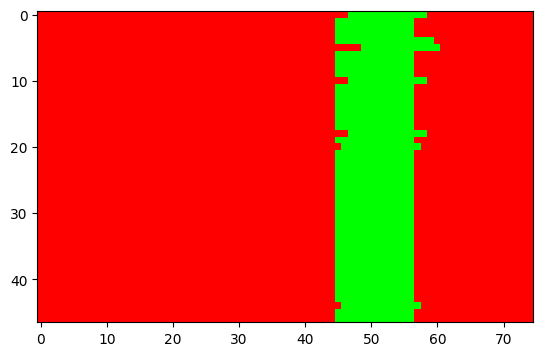

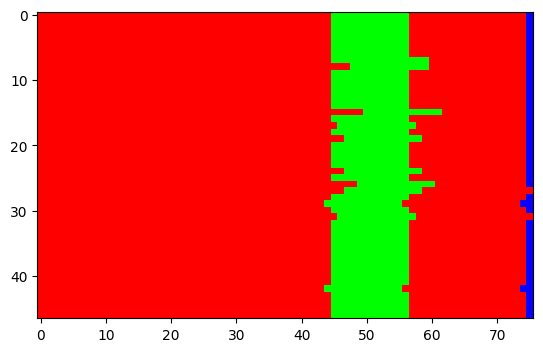

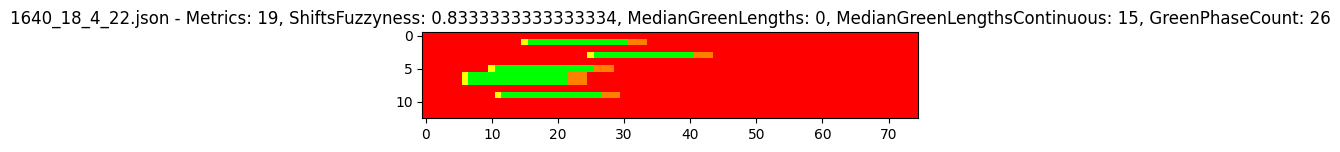

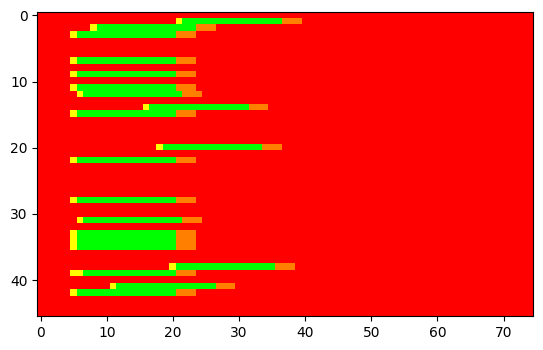

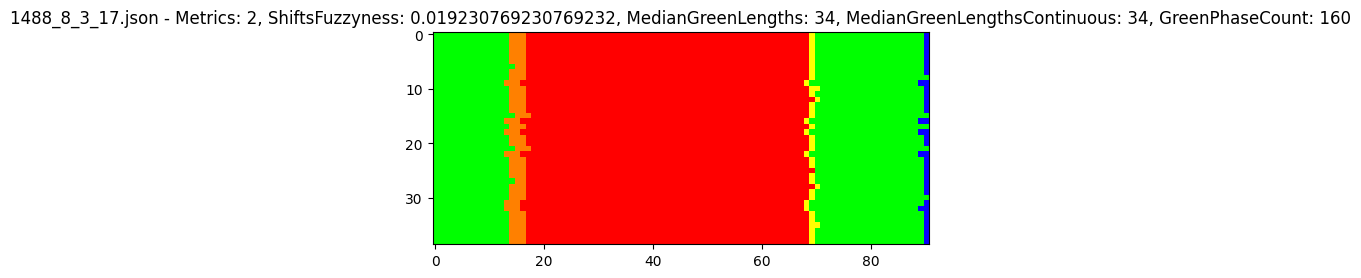

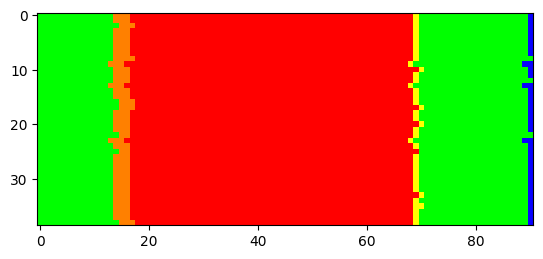

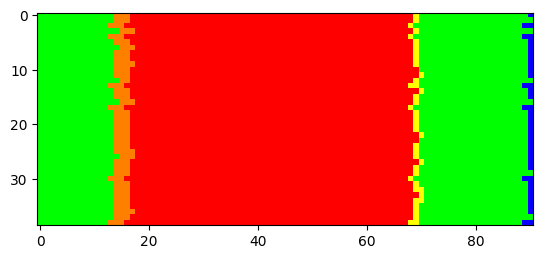

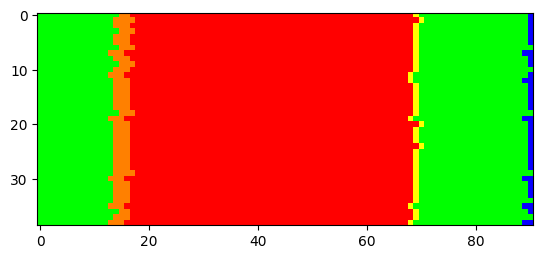

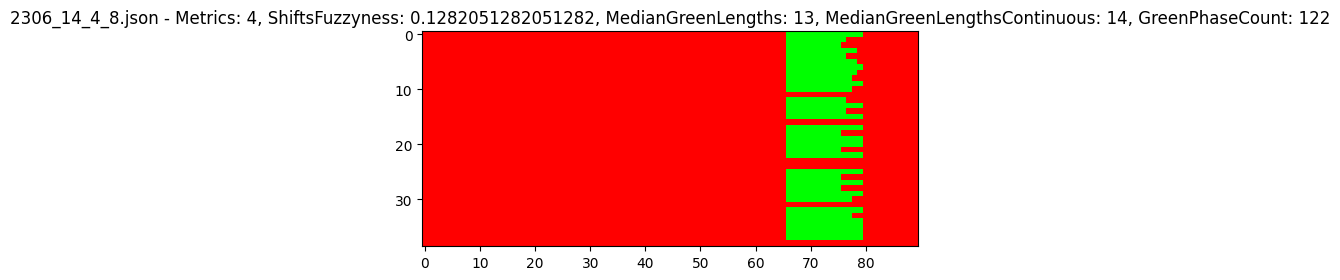

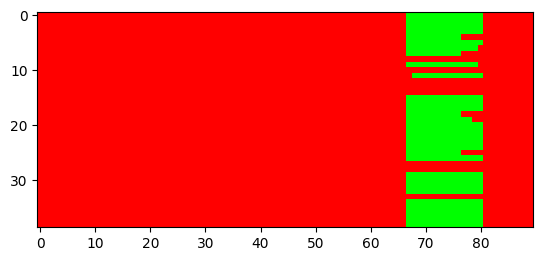

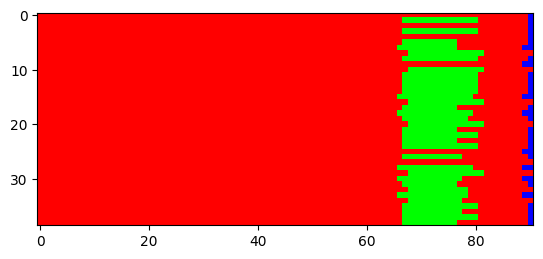

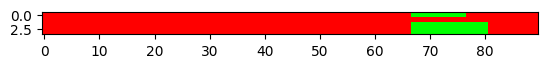

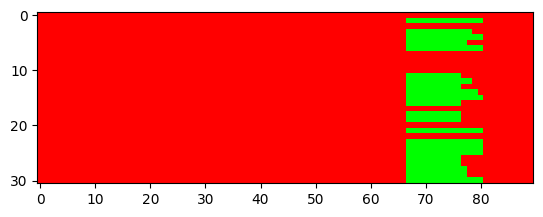

KeyboardInterrupt: 

In [8]:
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# 	Color encoding:
#	0 = dark
#	1 = red
#	2 = amber
#	3 = green
#	4 = red amber
#	5 = amber flashing
#	6 = green flashing

color_rgb_map = {
    0: (0, 0, 0),
    1: (255, 0, 0),
    2: (255, 128, 0),
    3: (0, 255, 0),
    4: (255, 255, 0),
    5: (255, 255, 0),
    6: (0, 255, 0),
}

green_states_rgb_map = {
    0: (0, 0, 0),
    1: (0, 255, 0),
}

all_case_studies = []

for filename in os.listdir("case_studies_all_random"):
    if ".json" not in filename:
        continue
    all_case_studies.append(filename)
    
# Randomize list
random.shuffle(all_case_studies)

def show_cycles(data, key):
    cycle_sets = data["Cycles"]
    first = True
    for cycle_set in cycle_sets:
        cycle_result_rows = []
        for cycle in cycle_set:
            results_string = cycle["Results"]
            results_string = results_string.replace("[", "")
            results_string = results_string.replace("]", "")
            results = results_string.split(" ")
            colors = [color_rgb_map[int(result)] for result in results]
            cycle_result_rows.append(colors)
        max_cycle_length = max([len(c) for c in cycle_result_rows])
        cycles_reconstructed = []
        for cycle in cycle_result_rows:
            row = cycle
            if len(row) < max_cycle_length:
                row = row + [(8, 0, 255)] * (max_cycle_length - len(row))
            cycles_reconstructed.append(row)
        # plt.imshow(green_state_colors)
        # plt.show()
        """ try:
            img = mpimg.imread(f'outputs/{key}_signal.png')
            imgplot = plt.imshow(img)
            plt.axis('off')
            plt.show()
            img = mpimg.imread(f'outputs/{key}_freq.png')
            imgplot = plt.imshow(img)
            plt.axis('off')
            plt.show()
        except FileNotFoundError:
            continue """
        metrics = data["Metrics"]
        shifts_fuzyness = data["ShiftsFuzzyness"]
        median_green_lengths = data["MedianGreenLengths"]
        median_green_lengths_continuous = data["MedianGreenLengthsContinuous"]
        green_phase_count = data["GreenPhaseCount"]
        if first: 
            plt.title(f"{key} - Metrics: {metrics}, ShiftsFuzzyness: {shifts_fuzyness}, MedianGreenLengths: {median_green_lengths}, MedianGreenLengthsContinuous: {median_green_lengths_continuous}, GreenPhaseCount: {green_phase_count}")
            first = False
        plt.imshow(cycles_reconstructed)
        plt.show()
        
for i in range(len(all_case_studies)):
    with open("case_studies_all_random/" + all_case_studies[i]) as f:
        data = json.load(f)
        
    show_cycles(data, all_case_studies[i])